<p style="text-align:center;">
<img src="https://github.com/digital-futures-academy/DataScienceMasterResources/blob/main/Resources/datascience-notebook-header.png?raw=true"
     alt="DigitalFuturesLogo"
     style="float: center; margin-right: 10px;" />
</p>

<p style="text-align:center;">
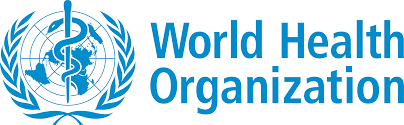
</p>

<p style="text-align:center; font-weight:bold; font-size:24px;">
Life Expectancy Prediction Model
</p>

## Importing Libraries and Data

In [1]:
# Importing python packages 
import numpy as np  # For math calculations
import seaborn as sns # For visualisation
import matplotlib.pyplot as plt # For visualisation
import pandas as pd # For dataframes & data analysis

from sklearn.model_selection import train_test_split ## Used for train test split 

## Importing modeling library (statsmodels) 
import statsmodels.api as sm
import statsmodels.tools

# For Scaling
from sklearn.preprocessing import StandardScaler

In [2]:
# Importing the data 
dataset = 'Life Expectancy Data.csv'
df = pd.read_csv(dataset)

In [3]:
# Checking for complete import
pd.reset_option('display.max_columns')
df.head(2)


,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8


## Data/Meta-Data Check

| Columns                         | In Notebook | In Metadata      | Standardisation           | Logging |
|:------------------------------- |:-----------:|:----------------:|--------------------------:|:-------:|
| Country                         | ✅           | ✅                |                        |         |
| Region                          | ✅           | ❌                |                        |         |
| Year                            | ✅           | ✅                |                        |         |
| Adult_mortality                 | ✅           | ✅                |✅                     |         |
| Infant_deaths                   | ✅           | ✅                |                         |         |
| Economy_status_Developed        | ✅           | **'Status'**      |                         |         |
| Economy_status_Developed        | ✅           | **'Status'**      |                           |         |
| Infant_deaths                   | ✅           | ✅                |                           |         |
| Alcohol_consumption             | ✅           | **'Alcohol'**     | ✅                       |         |
| percentage expenditure          | ❌           | ✅                |                           |         |
| Hepatitis_B                     | ✅           | ✅                |✅                        |         |
| Measles                         | ✅           | ✅                |                          |         |
| BMI                             | ✅           | ✅                |                           | ✅     |
| Under_five_deaths               | ✅           | ✅                |✅                        |         |
| Polio                           | ✅           | ✅                |✅                         |         |
| Total expenditure               | ❌           | ✅                |                           |         |
| Diphtheria                      | ✅           | ✅                |                           |         |
| Incidents_HIV                   | ✅           | **'HIV/AIDS'**    |                           |         |
| GDP_per_capita                  | ✅           | **'GDP'**         |                           | ✅      |
| Population_mln                  | ✅           | ✅                |                           |         |
| Thinness_ten_nineteen_years     | ✅           | **'thinness 1-19 years'** |                    |         |
| Thinness_five_nine_years        | ✅           | ✅                |                           |         |
| Income composition of resources | ❌           | ✅                |                           |         |
| Schooling                       | ✅           | ✅                |                           | ✅      |


## Test Train Split

Test train split model was created using **80%** for the training model and **20%** for the testing model (Data the model will not have seen).

### Feature Creation

In [4]:
## Seperate features from targets (Life_expectancy)
feature_cols = list(df.columns) ##select all columns 
feature_cols.remove('Life_expectancy') ## reomve Life_expectancy as this is the target 

In [5]:
feature_cols

['Country',
 'Region',
 'Year',
 'Infant_deaths',
 'Under_five_deaths',
 'Adult_mortality',
 'Alcohol_consumption',
 'Hepatitis_B',
 'Measles',
 'BMI',
 'Polio',
 'Diphtheria',
 'Incidents_HIV',
 'GDP_per_capita',
 'Population_mln',
 'Thinness_ten_nineteen_years',
 'Thinness_five_nine_years',
 'Schooling',
 'Economy_status_Developed',
 'Economy_status_Developing']

### Feature and Target Creation

In [6]:
X = df[feature_cols] ## dataframe holding all features 
y = df['Life_expectancy'] ##target looking to predict 

### Train Test Split Function

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, ## Features 
                                                    y, ## Targets 
                                                    test_size = 0.2, ## 20% allocated to the test
                                                    random_state = 84) ## Random state 84 selected for continuity

In [8]:
all(X_train.index == y_train.index) ## Indicies check 

True

In [9]:
all(X_test.index == y_test.index) ## Indicies check 

True

## Exploration And Cleaning

Here we checked for nulls and any inconsistancy in data types and column entries.

### Null Handelling in X_train

No null values were found. If any had been present, they would have been removed.

In [10]:
#Handling missing values
def null_vals(dataframe):
#Function to show both number of nulls and the percentage of nulls in the whole column
    null_vals = dataframe.isnull().sum() # How many nulls in each column
    total_cnt = len(dataframe) # Total entries in the dataframe
    null_vals = pd.DataFrame(null_vals,columns=['null']) # Put the number of nulls in a single dataframe
    null_vals['percent'] = round((null_vals['null']/total_cnt)*100,3) # Round how many nulls are there, as %, of the df
    
    return null_vals.sort_values('percent', ascending=False) # Return the number and percentage of missing values, order by percentage descending
null_vals(X_train) # Display the table

,null,percent
Country,0,0.0
Region,0,0.0
Economy_status_Developed,0,0.0
Schooling,0,0.0
Thinness_five_nine_years,0,0.0
Thinness_ten_nineteen_years,0,0.0
Population_mln,0,0.0
GDP_per_capita,0,0.0
Incidents_HIV,0,0.0
Diphtheria,0,0.0


### Column Data Type Handelling in X_train

In [11]:
X_train.dtypes # Checking for the different data types

Country                         object
Region                          object
Year                             int64
Infant_deaths                  float64
Under_five_deaths              float64
Adult_mortality                float64
Alcohol_consumption            float64
Hepatitis_B                      int64
Measles                          int64
BMI                            float64
Polio                            int64
Diphtheria                       int64
Incidents_HIV                  float64
GDP_per_capita                   int64
Population_mln                 float64
Thinness_ten_nineteen_years    float64
Thinness_five_nine_years       float64
Schooling                      float64
Economy_status_Developed         int64
Economy_status_Developing        int64
dtype: object

This section was used to confirm the relationship between the status of **_Developed_** and **_Developing_** countries.

We observed that there were no instances where both columns had values of zero. Therefore, we can conclude that the information from both columns is mutually exclusive :

- A country is either **_Developed_** or **_Developing_**

In [12]:
X_train['Economy_status_Developed'].unique() # Loking for the unique values in Economy_status_Developed columns

array([0, 1])

In [13]:
X_train['Economy_status_Developing'].unique() # Loking for the unique values in Economy_status_Developing columns

array([1, 0])

In [14]:
X_train[(X_train.Economy_status_Developed == 0) & (X_train.Economy_status_Developing == 0)] ##check if developing vs developed is mutually exclusive 

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing


#### This section ensures that all country names are entered correctly and consistently.

##### By sorting the unique country names alphabetically, we can identify any minor spelling variations. Additionally, by comparing the count of the original column with the count of the column with names converted to lowercase and stripped of whitespace, we can detect duplicates that may have been overlooked due to character differences.

In [15]:
unique_country = pd.DataFrame(X_train['Country'].unique()) # Putting the unique country names into a dataframe.

In [16]:
unique_country

,0
0,Samoa
1,Malta
2,Latvia
3,Maldives
4,United Kingdom
...,...
174,Thailand
175,"Bahamas, The"
176,Nigeria
177,Cameroon


In [17]:
pd.set_option('display.max_rows', 180)

In [18]:
unique_country.sort_values(by=0,ascending=True) # Sorting the columns to look for minor spelling changes

,0
122,Afghanistan
9,Albania
145,Algeria
137,Angola
51,Antigua and Barbuda
100,Argentina
25,Armenia
82,Australia
116,Austria
109,Azerbaijan


In [19]:
X_train['Country'].nunique() # Count of unique countries

179

In [20]:
X_train['Country'].str.lower().str.strip().nunique() # Count of unique countries once formatted uniformly

179

#### This section is to check that the region names are entered correctly and consistently.

In [21]:
unique_region = pd.DataFrame(X_train['Region'].unique()).sort_values(by=0) # Putting the unique region names into a dataframe.

In [22]:
unique_region # Visually, all inputs are consistant

,0
4,Africa
2,Asia
5,Central America and Caribbean
1,European Union
6,Middle East
8,North America
0,Oceania
3,Rest of Europe
7,South America


## Correlation Matrix

#### Looking at the relationship between the features and how the features correlate to the target.

##### This will be used in deciding which features columns will contribute to the model

In [23]:
##check correlation 
df.corr()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
Year,1.000000e+00,-0.172402,-0.176393,-0.158660,-0.000611,0.176824,0.085945,0.161422,0.139858,0.145143,-0.081743,0.040998,0.015158,-0.044901,-0.048038,0.150539,-5.026601e-15,4.975598e-15,0.174359
Infant_deaths,-1.724017e-01,1.000000,0.985651,0.794661,-0.454526,-0.512562,-0.526282,-0.661988,-0.740790,-0.721875,0.349458,-0.512286,0.007622,0.491192,0.477639,-0.788513,-4.758662e-01,4.758662e-01,-0.920032
Under_five_deaths,-1.763926e-01,0.985651,1.000000,0.802361,-0.409367,-0.507427,-0.512972,-0.665255,-0.742983,-0.725355,0.369618,-0.469682,-0.005234,0.466978,0.450756,-0.773196,-4.271342e-01,4.271342e-01,-0.920419
Adult_mortality,-1.586596e-01,0.794661,0.802361,1.000000,-0.244794,-0.344882,-0.416153,-0.522866,-0.524226,-0.513803,0.699119,-0.510121,-0.053848,0.382140,0.379792,-0.581035,-4.293748e-01,4.293748e-01,-0.945360
Alcohol_consumption,-6.105222e-04,-0.454526,-0.409367,-0.244794,1.000000,0.168436,0.318603,0.284032,0.301926,0.299016,-0.034118,0.443966,-0.039119,-0.446366,-0.433030,0.615728,6.703661e-01,-6.703661e-01,0.399159
Hepatitis_B,1.768241e-01,-0.512562,-0.507427,-0.344882,0.168436,1.000000,0.429168,0.345421,0.724345,0.761780,-0.075782,0.159375,-0.082396,-0.208453,-0.213794,0.347643,1.135340e-01,-1.135340e-01,0.417804
Measles,8.594472e-02,-0.526282,-0.512972,-0.416153,0.318603,0.429168,1.000000,0.416321,0.514096,0.494059,-0.150580,0.313724,-0.098222,-0.340705,-0.366970,0.498391,2.986933e-01,-2.986933e-01,0.490019
BMI,1.614225e-01,-0.661988,-0.665255,-0.522866,0.284032,0.345421,0.416321,1.000000,0.457206,0.426501,-0.161142,0.336180,-0.166482,-0.596483,-0.599112,0.635475,2.432870e-01,-2.432870e-01,0.598423
Polio,1.398584e-01,-0.740790,-0.742983,-0.524226,0.301926,0.724345,0.514096,0.457206,1.000000,0.953178,-0.147952,0.313786,-0.033486,-0.312685,-0.306998,0.552765,2.832601e-01,-2.832601e-01,0.641217
Diphtheria,1.451429e-01,-0.721875,-0.725355,-0.513803,0.299016,0.761780,0.494059,0.426501,0.953178,1.000000,-0.146932,0.313321,-0.027336,-0.304466,-0.295597,0.535621,2.894172e-01,-2.894172e-01,0.627541


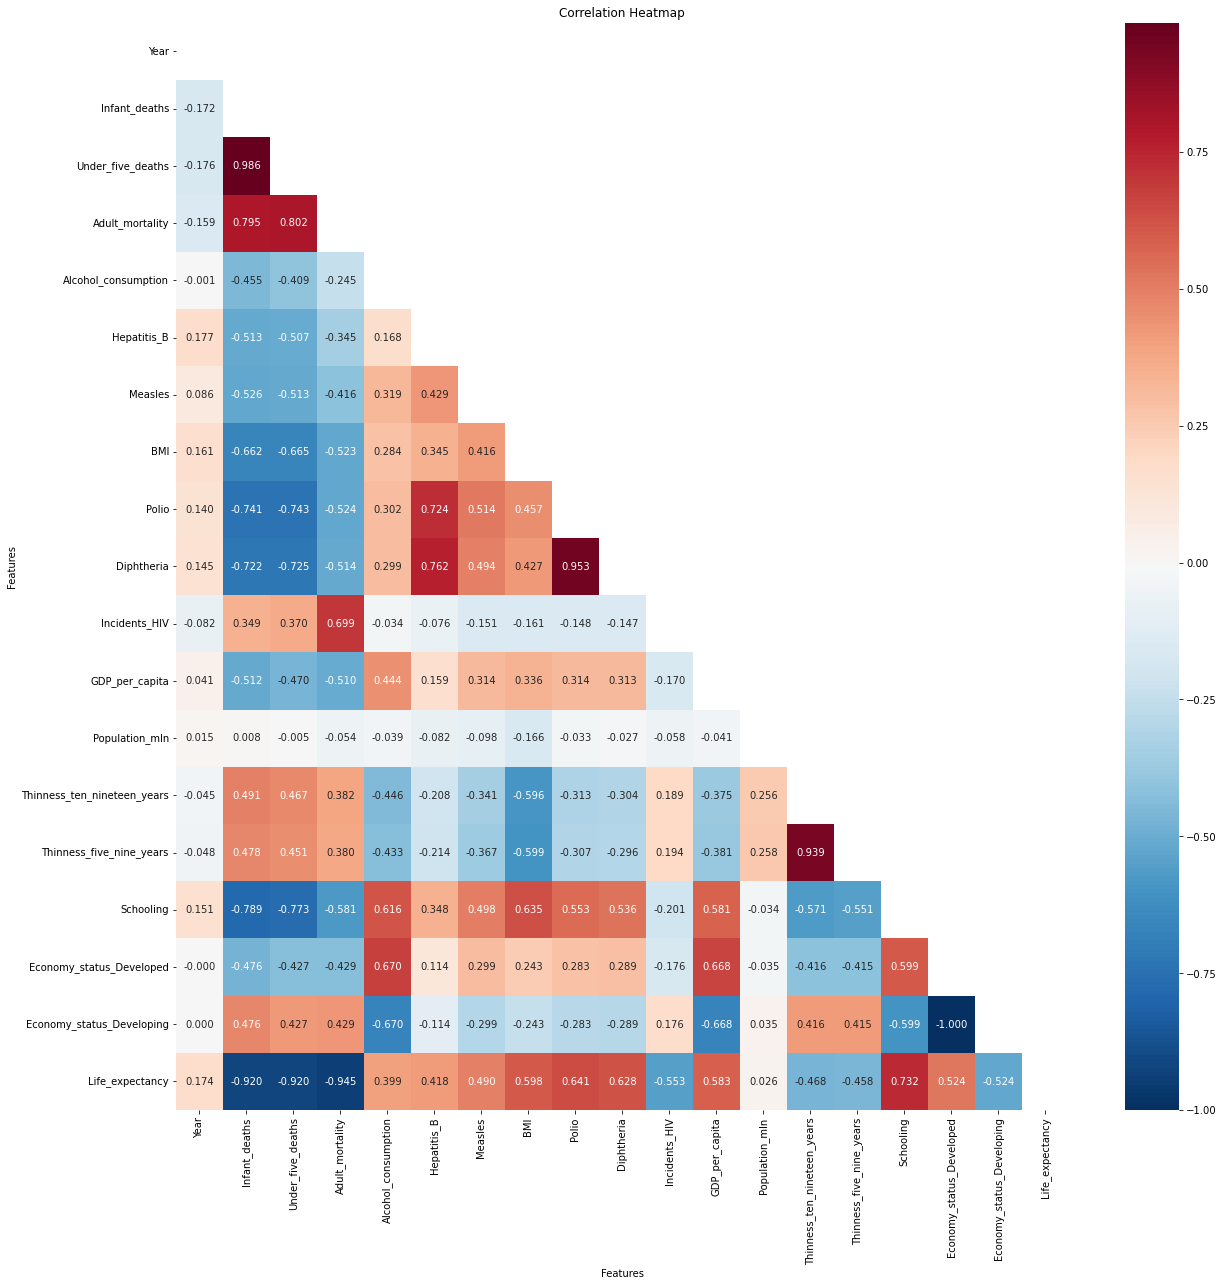

In [24]:
# Graphical Representation of the correlations (Heatmap)
plt.figure(figsize=(20, 20))

# Create the heatmap
sns.heatmap(df.corr(), 
            annot=True,
            fmt='.3f',
            cmap='RdBu_r',
            mask=np.triu(df.corr()))

# Add a title and axis labels
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()

## Standardisation

### X_train / X_test (Scaling)

#### Adult Mortality

In [25]:
df_scale_train = X_train[['Adult_mortality']]
df_scale_test = X_test[['Adult_mortality']]
Z = StandardScaler() ## Initial scaler
Z.fit(df_scale_train) ## Fit the data

## Transform the data according to the scaler
## Save it as a new dataframe called df_scale_z
df_scale_z_train = Z.transform(df_scale_train)
df_scale_z_test = Z.transform(df_scale_test)

X_train['Adult_mortality_scaled'] = df_scale_z_train
X_test['Adult_mortality_scaled'] = df_scale_z_test

#### Polio

In [26]:
df_scale_train = X_train[['Polio']]
df_scale_test = X_test[['Polio']]
Z = StandardScaler() ## Initial scaler
Z.fit(df_scale_train) ## Fit the data

## Transform the data according to the scaler
## Save it as a new dataframe called df_scale_z
df_scale_z_train = Z.transform(df_scale_train)
df_scale_z_test = Z.transform(df_scale_test)

X_train['Polio_scaled'] = df_scale_z_train
X_test['Polio_scaled'] = df_scale_z_test

#### Alcohol Consumption

In [27]:
df_scale_train = X_train[['Alcohol_consumption']]
df_scale_test = X_test[['Alcohol_consumption']]
Z = StandardScaler() ## Initial scaler
Z.fit(df_scale_train) ## Fit the data

## Transform the data according to the scaler
## Save it as a new dataframe called df_scale_z
df_scale_z_train = Z.transform(df_scale_train)
df_scale_z_test = Z.transform(df_scale_test)

X_train['Alcohol_consumption_scaled'] = df_scale_z_train
X_test['Alcohol_consumption_scaled'] = df_scale_z_test

#### Hepatitis B

In [28]:
df_scale_train = X_train[['Hepatitis_B']]
df_scale_test = X_test[['Hepatitis_B']]
Z = StandardScaler() ## Initial scaler
Z.fit(df_scale_train) ## Fit the data

## Transform the data according to the scaler
## Save it as a new dataframe called df_scale_z
df_scale_z_train = Z.transform(df_scale_train)
df_scale_z_test = Z.transform(df_scale_test)

X_train['Hepatitis_B_scaled'] = df_scale_z_train
X_test['Hepatitis_B_scaled'] = df_scale_z_test

#### Under five deaths

In [29]:
df_scale_train = X_train[['Under_five_deaths']]
df_scale_test = X_test[['Under_five_deaths']]
Z = StandardScaler() ## Initial scaler
Z.fit(df_scale_train) ## Fit the data

## Transform the data according to the scaler
## Save it as a new dataframe called df_scale_z
df_scale_z_train = Z.transform(df_scale_train)
df_scale_z_test = Z.transform(df_scale_test)

X_train['Under_five_deaths_scaled'] = df_scale_z_train
X_test['Under_five_deaths_scaled'] = df_scale_z_test

#### Grouped Features Correlation With Life Expectancy

This section was used to explore 

- Multicolinearity : Feature columns (For example Polio and Diptheria have a correlation of 0.953)
    
    
- Correlation with the target ('Life_expectancy')

##### Diseases

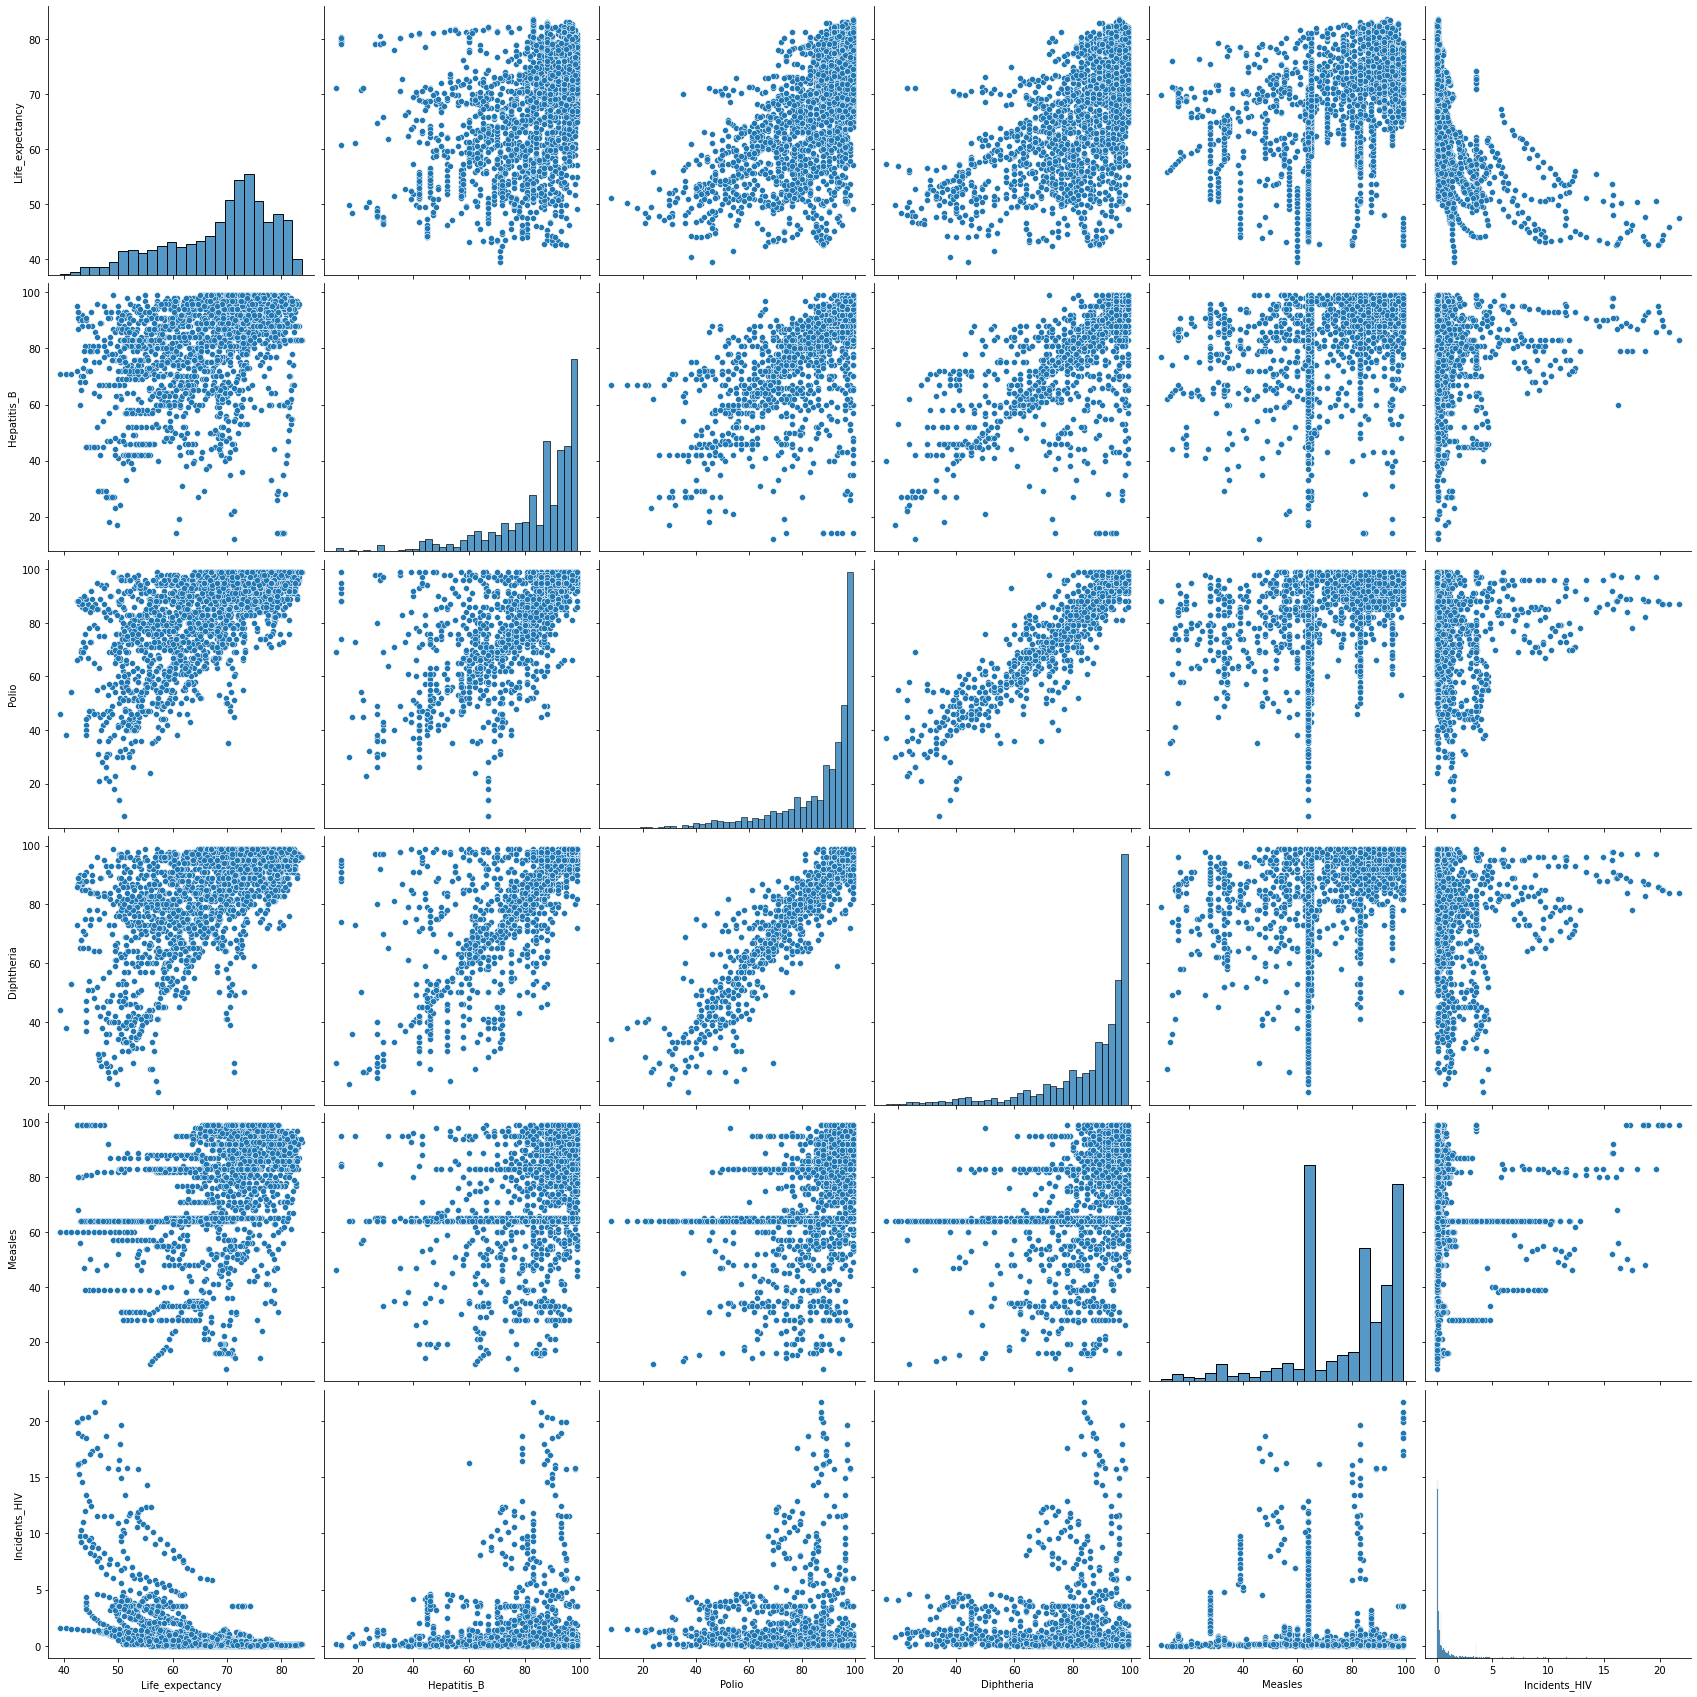

In [30]:
#Diseases correlation to life expectancy
sns.pairplot(df[['Life_expectancy','Hepatitis_B','Polio','Diphtheria','Measles','Incidents_HIV']],
             height = 4)
plt.show()

##### Mortality

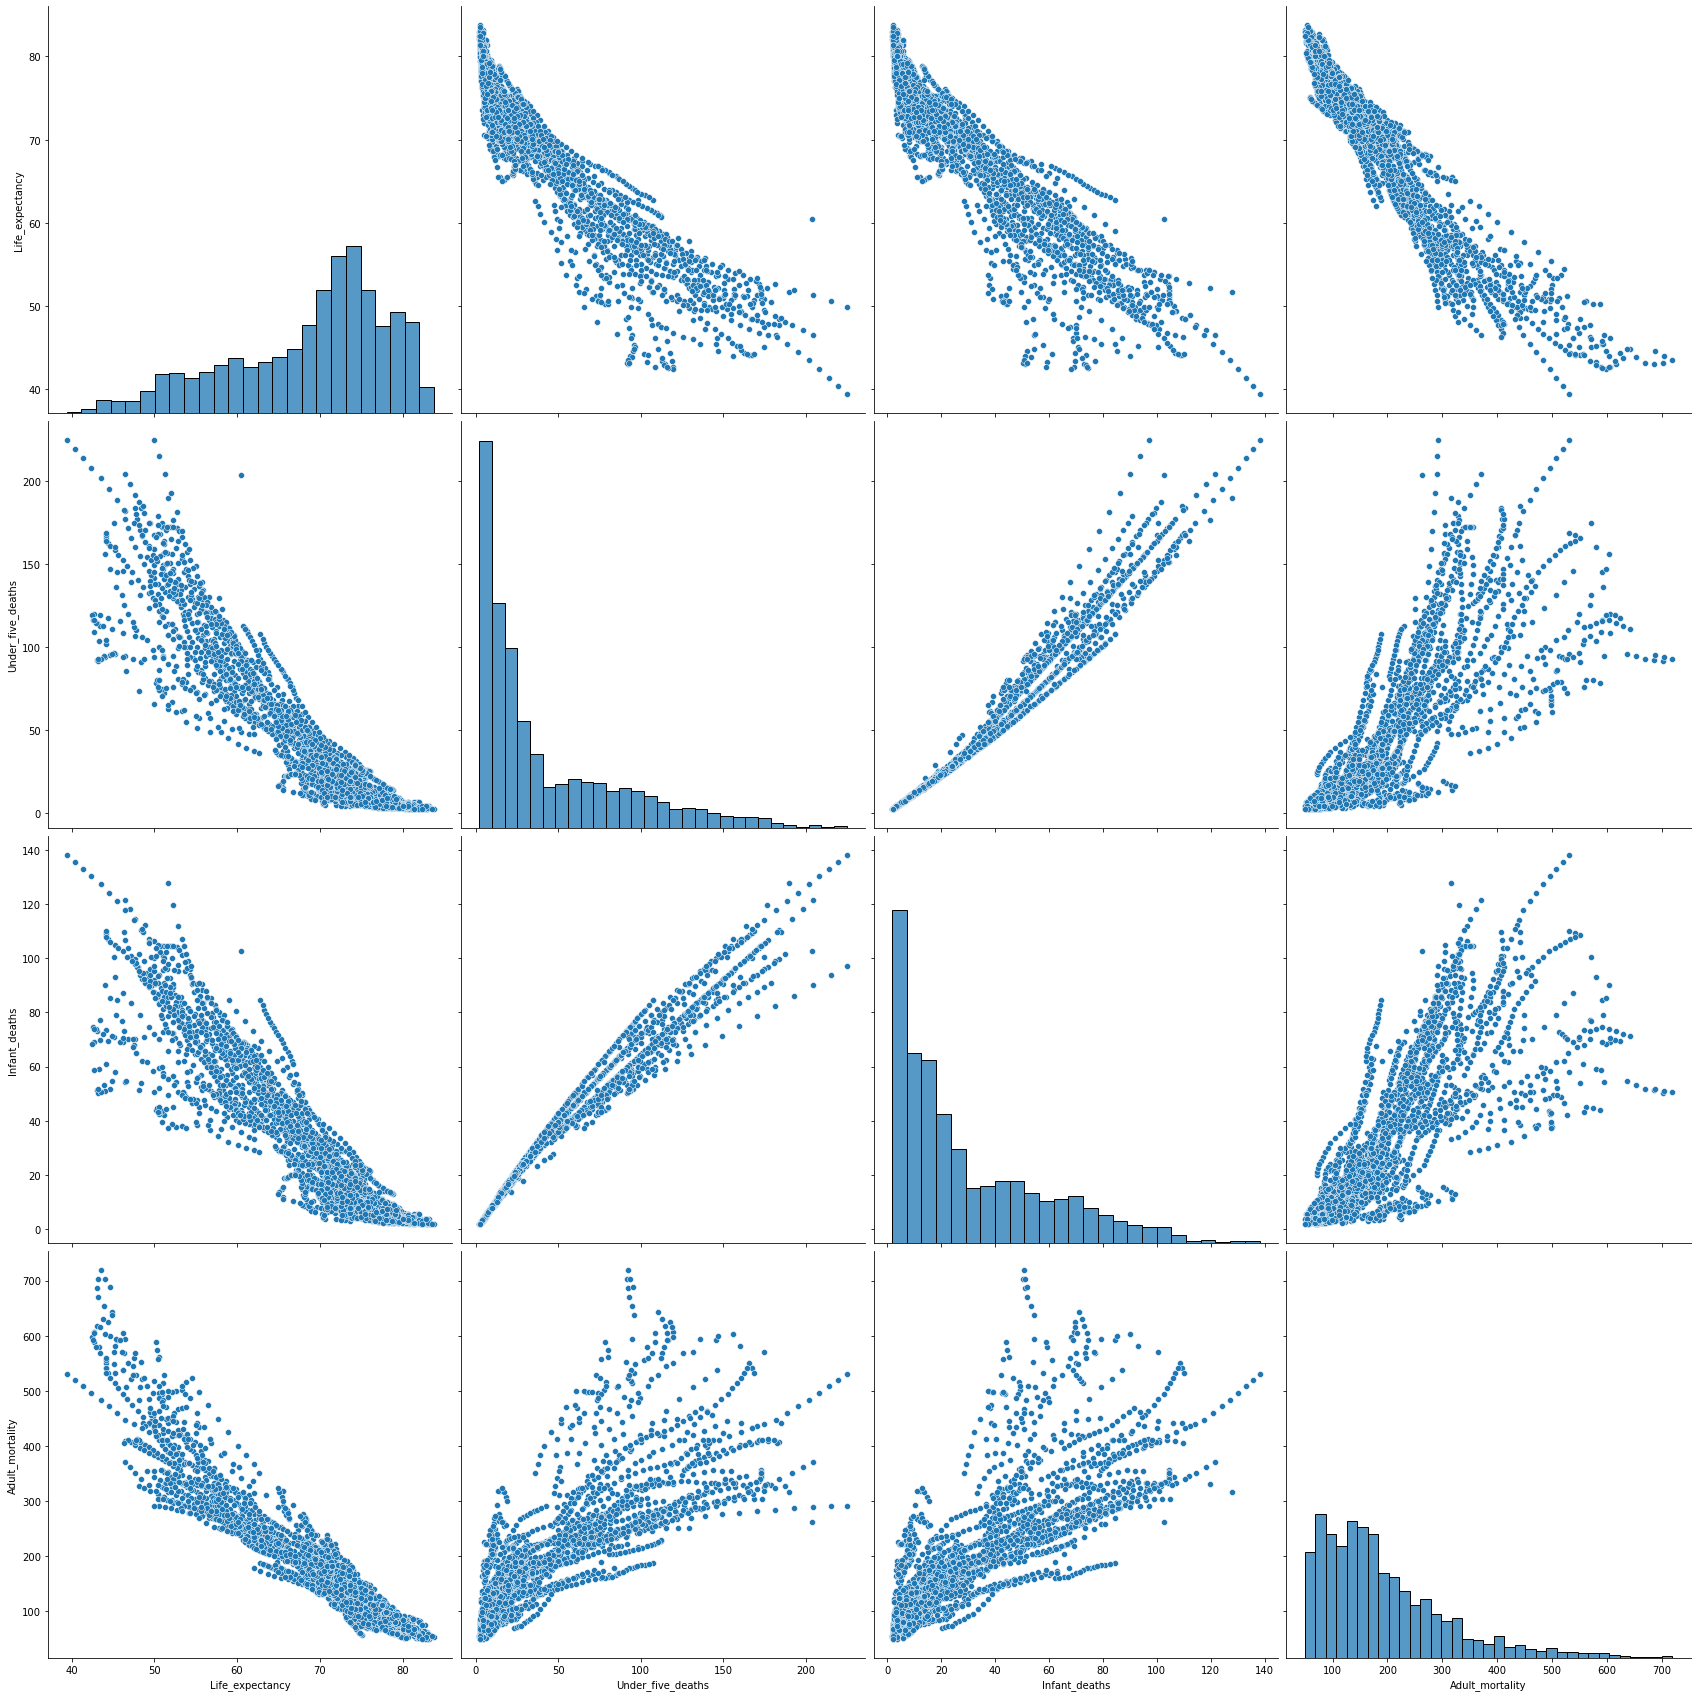

In [31]:
# Mortalitly correlation to life expectancy
sns.pairplot(df[['Life_expectancy','Under_five_deaths', 'Infant_deaths', 'Adult_mortality']],
             height = 6)
plt.show()

##### Country

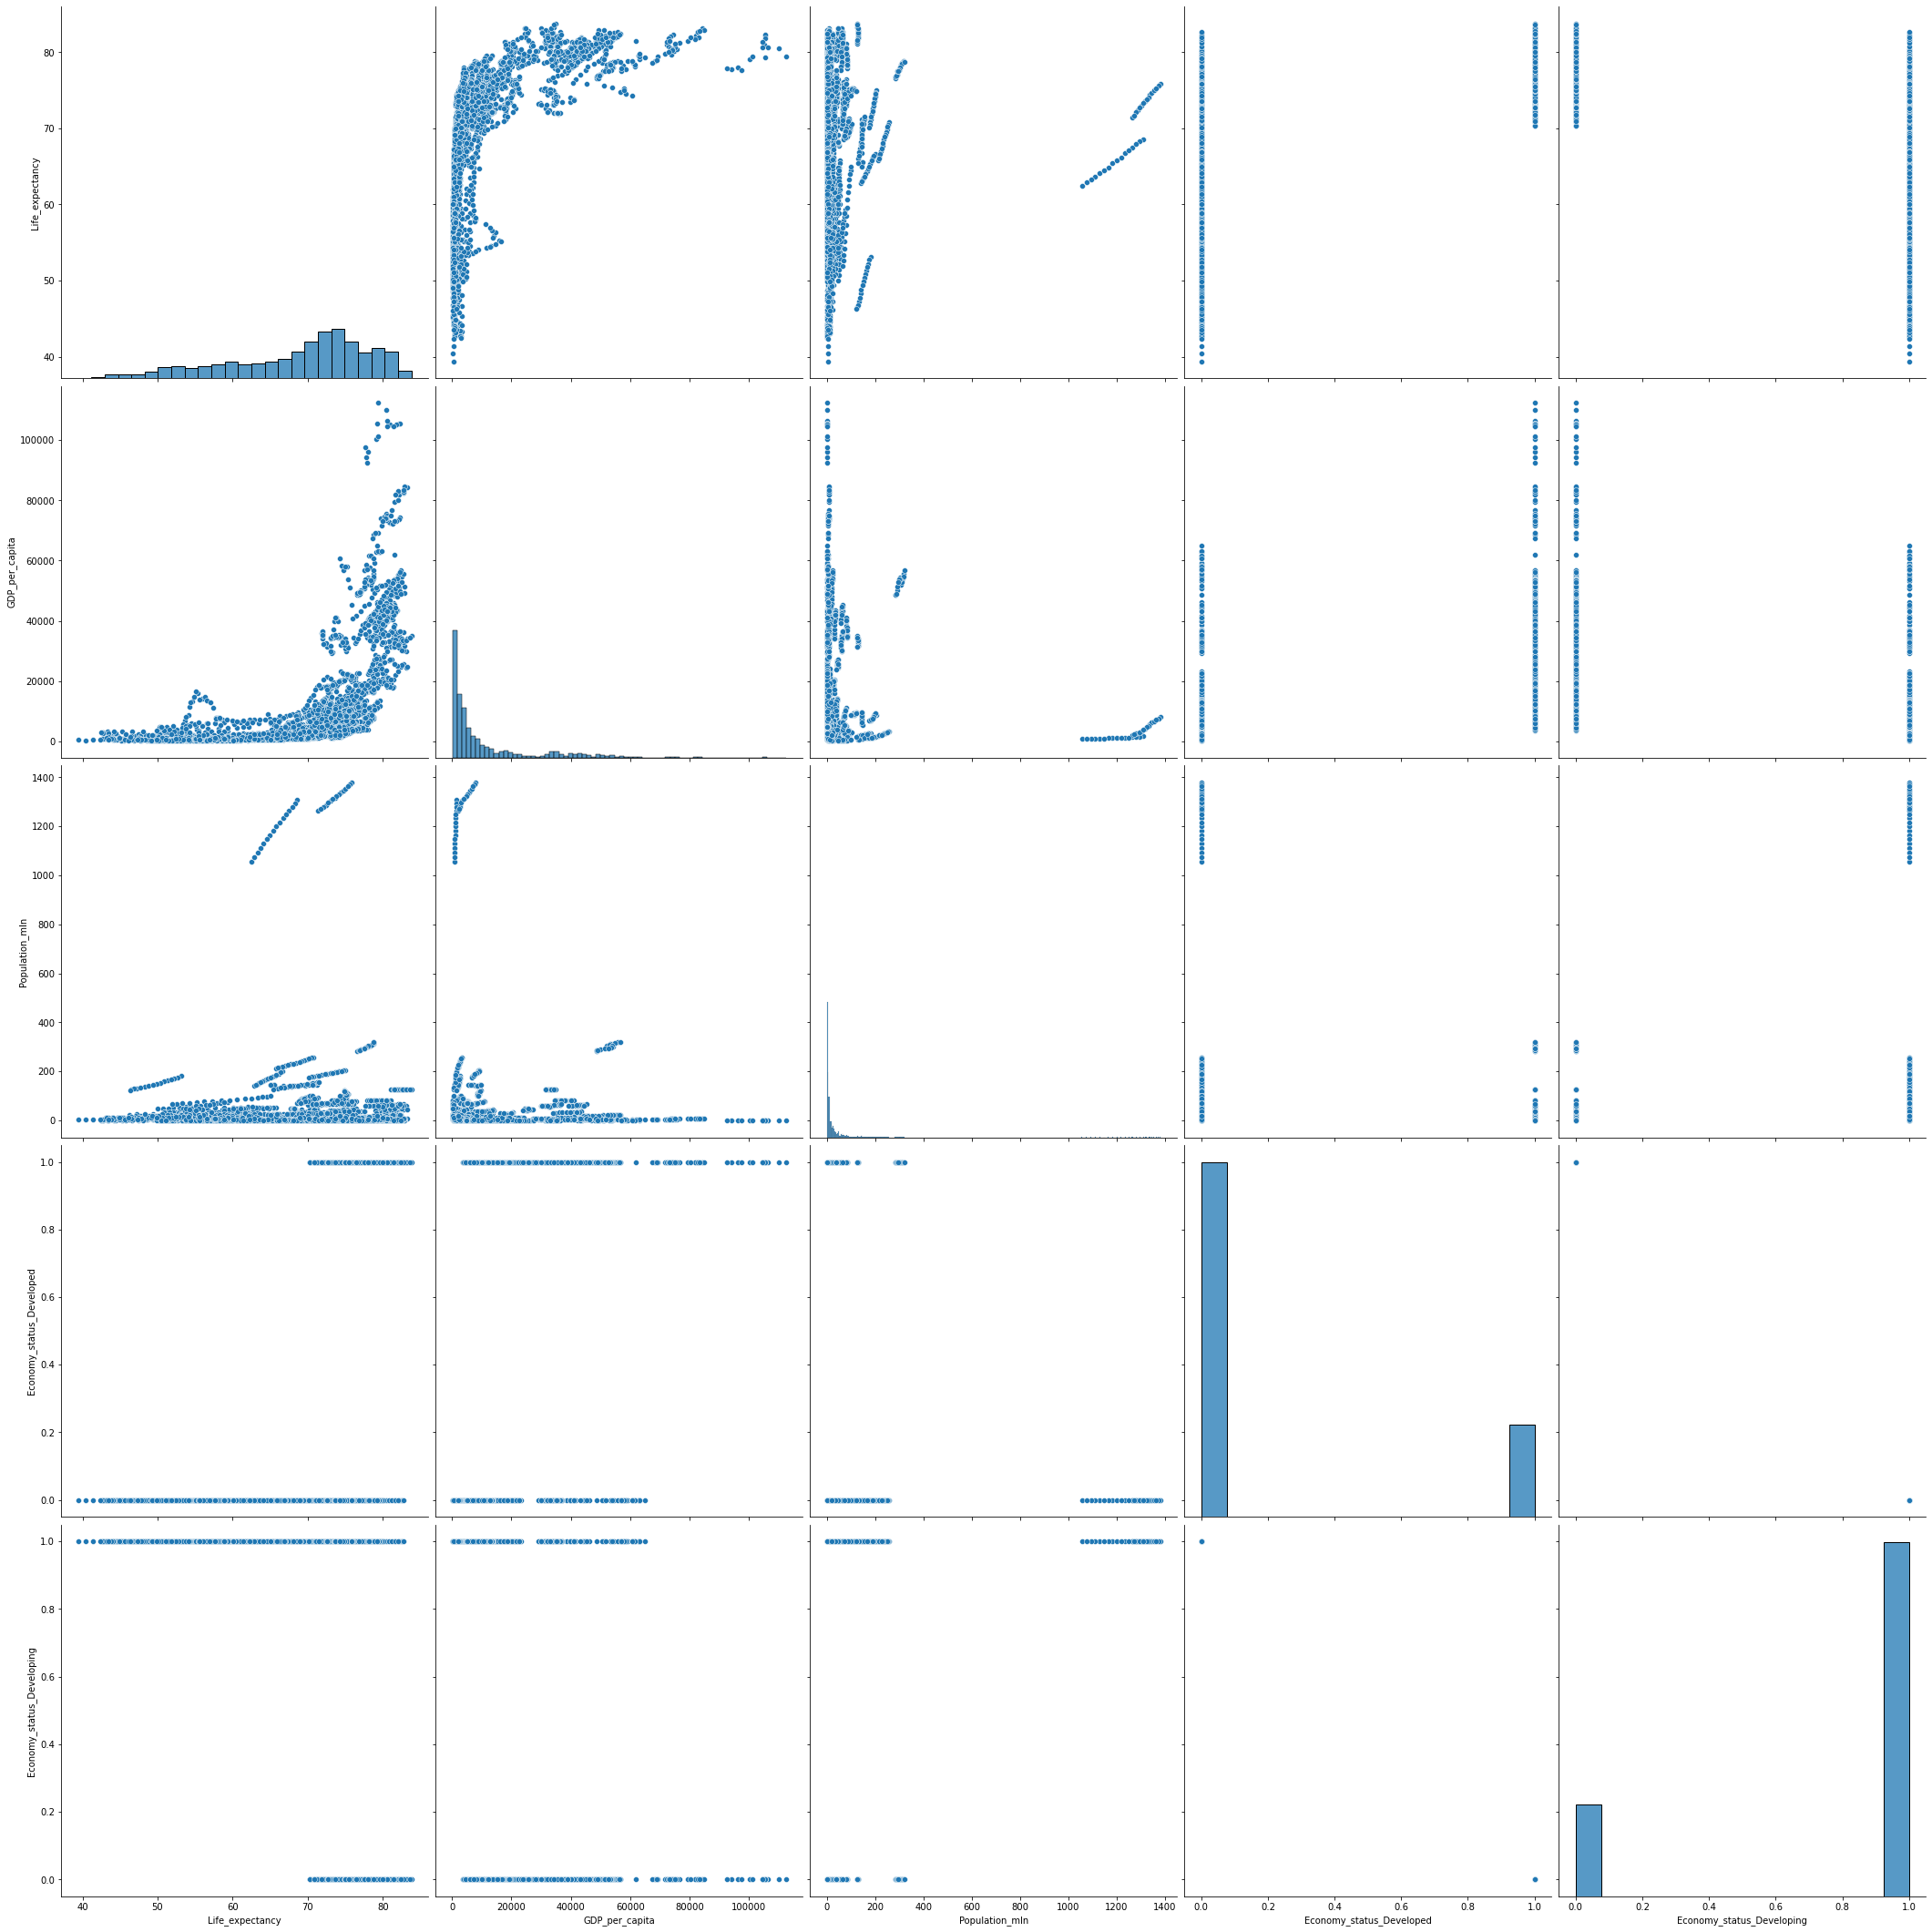

In [32]:
# Country condition correlation to life expectancy
sns.pairplot(df[['Life_expectancy','Country', 'GDP_per_capita','Region', 'Population_mln', 'Economy_status_Developed', 'Economy_status_Developing']],
             height = 6)
plt.show()

##### Personal

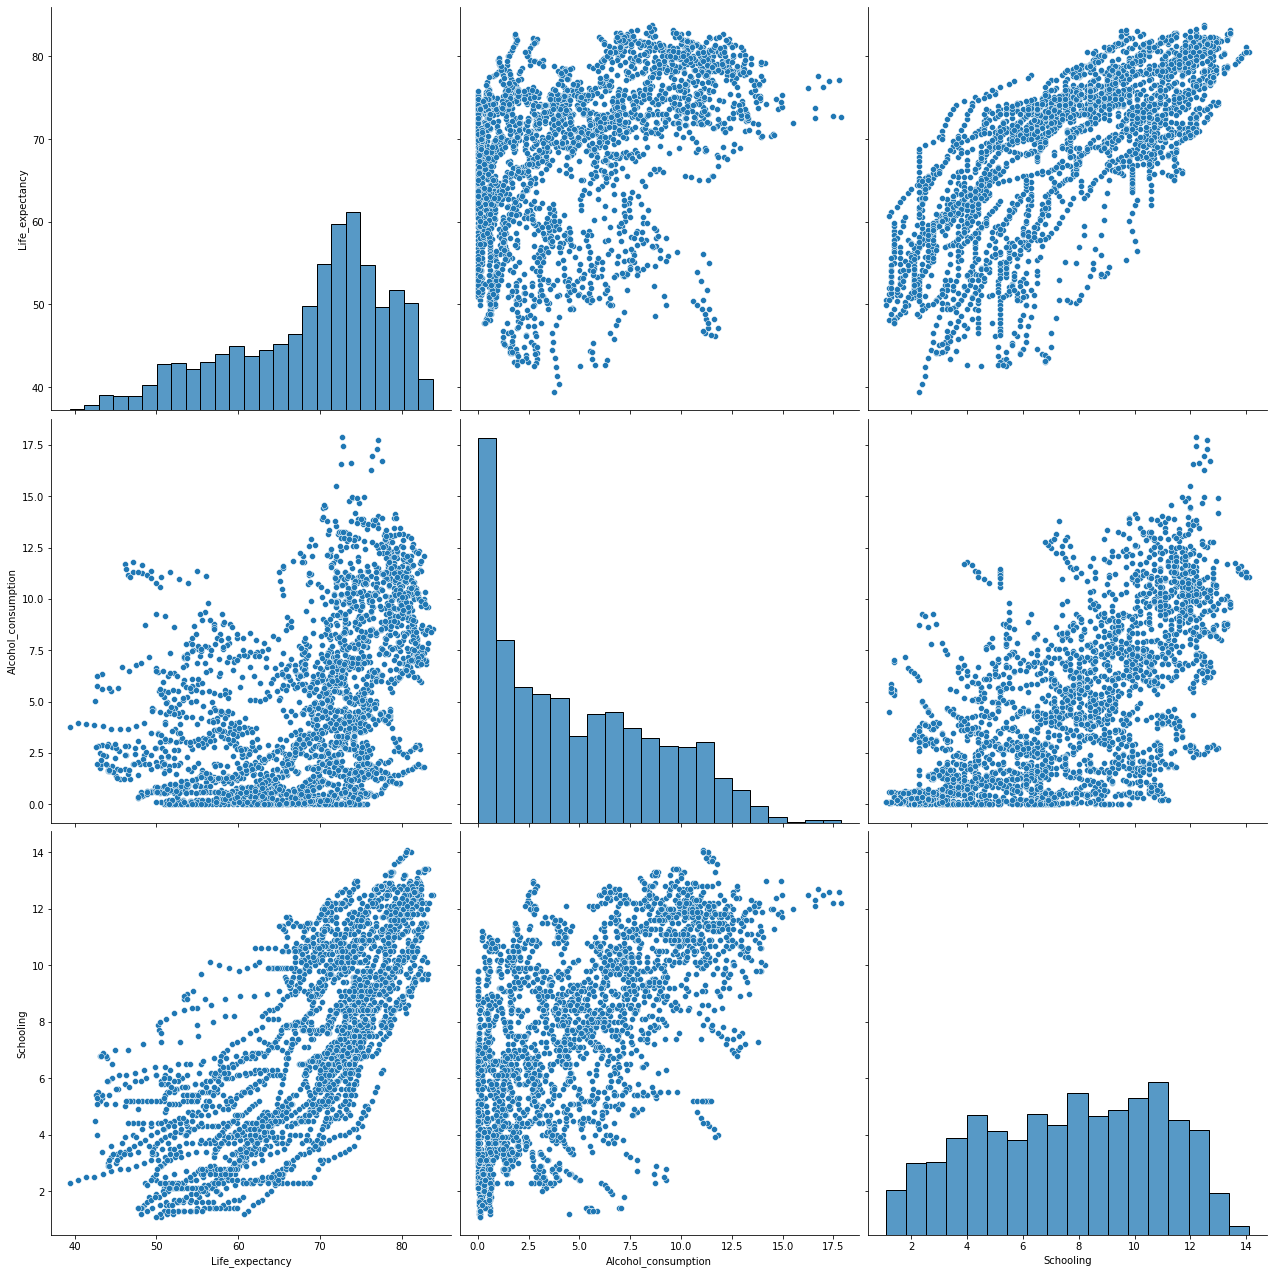

In [33]:
# Personal condition correlation to life expectancy
sns.pairplot(df[['Life_expectancy','Alcohol_consumption','Schooling']],
             height = 6)
plt.show()

##### Body

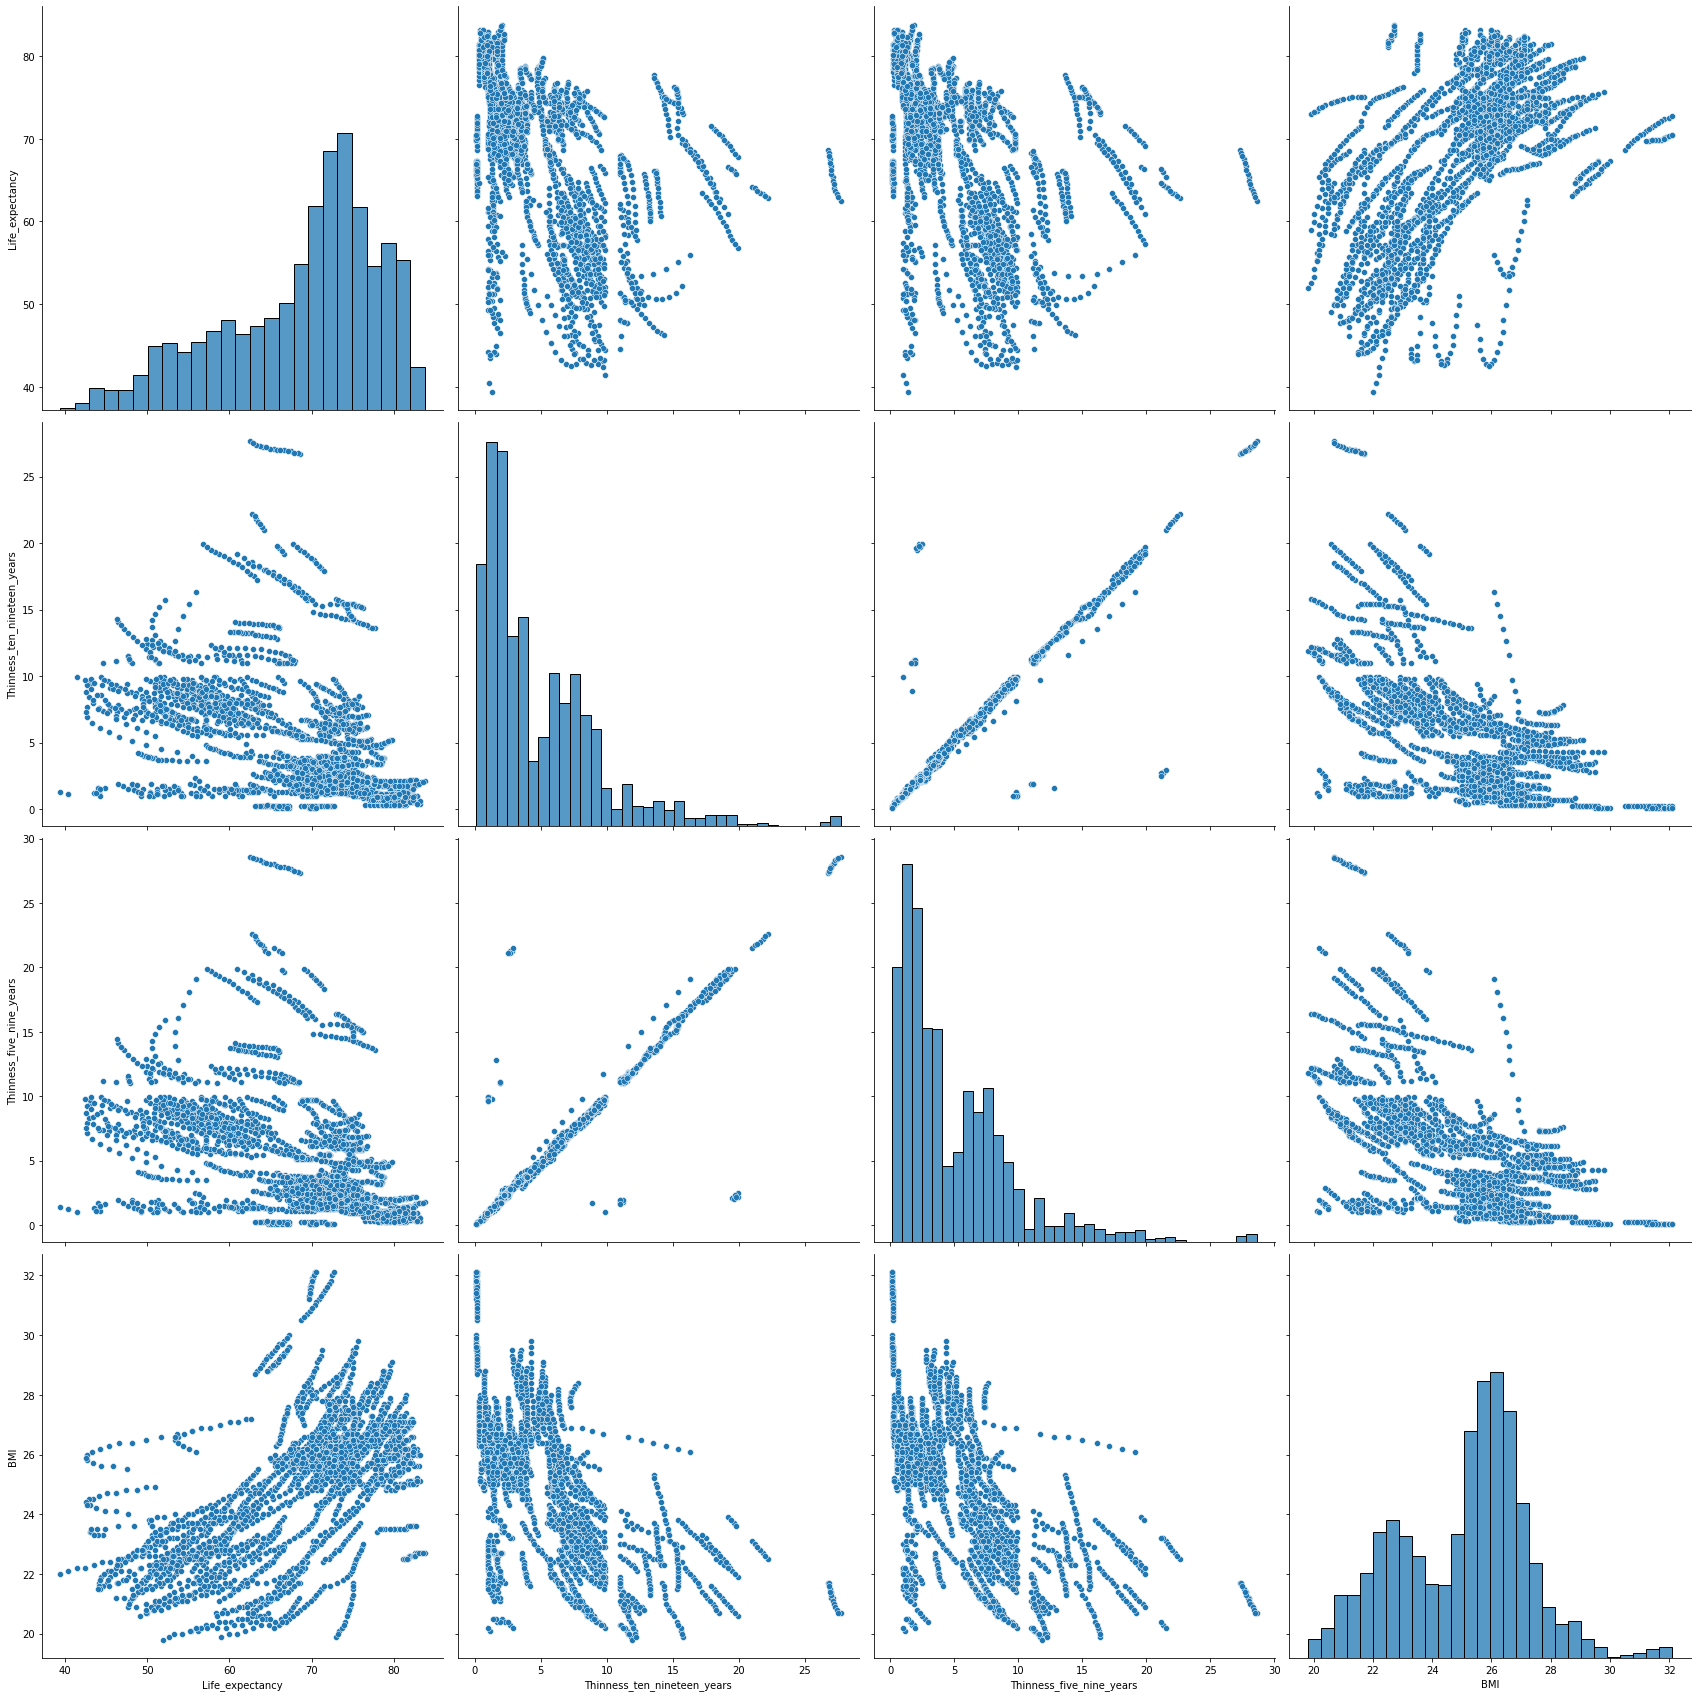

In [34]:
# Body condition correlation to life expectancy
sns.pairplot(df[['Life_expectancy','Thinness_ten_nineteen_years','Thinness_five_nine_years','BMI' ]],
             height = 6)
plt.show()

## Logging

In [35]:
X_train['GDP_log'] = np.log(X_train['GDP_per_capita'])
X_test['GDP_log'] = np.log(X_test['GDP_per_capita'])
X_train['Schooling_log'] = np.log(X_train['Schooling'])
X_test['Schooling_log'] = np.log(X_test['Schooling'])
X_train['BMI_log'] = np.log(X_train['BMI'])
X_test['BMI_log'] = np.log(X_test['BMI'])

## Creating the constant function

In [36]:
def add_constant(df):
        df = df.copy() #Create a local copy
        df = sm.add_constant(df) #Add a constating, as we are using statsmodels
        return df

In [37]:
X_train = add_constant(X_train)  # Adding a constant column in the X_train set

## Fitting

### Regular Model

Based on our earlier findings we selected these features :

- 'const'
- 'GDP_log'
- 'Adult_mortality_scaled'
- 'Polio_scaled'
- 'Schooling_log'
- 'Alcohol_consumption_scaled'
- 'Hepatitis_B_scaled'
- 'Economy_status_Developing'
- 'Under_five_deaths_scaled'
- 'BMI_log'

Which gave the best balance fro R-Squared, Condition number and RMSE score.

In [38]:
feature_cols = ['const', 'GDP_log', 'Adult_mortality_scaled', 'Polio_scaled', 'Schooling_log', 'Alcohol_consumption_scaled', 'Hepatitis_B_scaled', 'Economy_status_Developing', 'Under_five_deaths_scaled', 'BMI_log']

## Create and train an OLS linear regression
lin_reg = sm.OLS(y_train, X_train[feature_cols]) # Creating model
results = lin_reg.fit() # Fit model and store/save it
results.summary() # Print the results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 1.165e+04
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        16:28:01   Log-Likelihood:                -3974.2
No. Observations:                2291   AIC:                             7968.
Df Residuals:                    2281   BIC:                             8026.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         75.5427      1.436     52.601      0.000      72.726      78.359
GDP_log                        0.5751      0.040     14.289      0.000       0.496       0.654
Adult_mortality_scaled        -5.2888      0.054    -97.594      0.000      -5.395      -5.183
Polio_scaled                   0.1753      0.054      3.245      0.001       0.069       0.281
Schooling_log                  0.4242      0.112      3.781      0.000       0.204       0.644
Alcohol_consumption_scaled     0.2287      0.043      5.331      0.000       0.145       0.313
Hepatitis_B_scaled            -0.1220      0.042     -2.917      0.004      -0.204      -0.040
Economy_status_Developing     -1.0922      0.114     -9.599      0.000      -1.315      -0.869
Under_five_deaths_scaled      -3.4742      0.085    -40.843      0.000      -3.641      -3.307
BMI_log                       -3.5869      0.484     -7.413      0.000      -4.536      -2.638
==============================================================================
Omnibus:                       30.379   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.211
Skew:                           0.192   Prob(JB):                     5.04e-09
Kurtosis:                       3.503   Cond. No.                         494.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Baseline Results (With all features):

- R-Squared = 0.979
- Cond.No. = 9.08e+06
- RMSE y_pred = 1.3507
- RMSE y_test_pred = 1.3651

### Ethical Model

The features below are kept from our regular model to make a more ethical model :

- 'const'
- 'GDP_log'
- 'Adult_mortality_scaled'
- 'Polio_scaled'
- 'Hepatitis_B_scaled'
- 'Economy_status_Developing'
- 'Under_five_deaths_scaled'

These features are kept because they are goverment records and does not infringe on personal information.

In [39]:
feature_cols_e = ['const', 'GDP_log', 'Adult_mortality_scaled', 'Polio_scaled', 'Hepatitis_B_scaled', 'Economy_status_Developing', 'Under_five_deaths_scaled']

## Create and train an OLS linear regression
lin_reg_e = sm.OLS(y_train, X_train[feature_cols_e]) # Creating model
results_e = lin_reg_e.fit() # Fit model and store/save it
results_e.summary() # Print the results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 1.677e+04
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        16:28:01   Log-Likelihood:                -4021.9
No. Observations:                2291   AIC:                             8058.
Df Residuals:                    2284   BIC:                             8098.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        65.4562      0.361    181.171      0.000      64.748      66.165
GDP_log                       0.5508      0.037     14.738      0.000       0.478       0.624
Adult_mortality_scaled       -5.1487      0.050   -102.399      0.000      -5.247      -5.050
Polio_scaled                  0.1876      0.055      3.411      0.001       0.080       0.295
Hepatitis_B_scaled           -0.1394      0.043     -3.275      0.001      -0.223      -0.056
Economy_status_Developing    -1.6327      0.097    -16.851      0.000      -1.823      -1.443
Under_five_deaths_scaled     -3.5828      0.071    -50.203      0.000      -3.723      -3.443
==============================================================================
Omnibus:                       27.119   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.851
Skew:                           0.049   Prob(JB):                     1.82e-10
Kurtosis:                       3.678   Cond. No.                         109.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Prediction and Metrics

In [40]:
X_test = add_constant(X_test) # Adding a constant column in the X_test set

### Regular Model

In [41]:
y_pred = results.predict(X_train[feature_cols])

# Get the RMSE of the model: y_train (real) against y_pred (predicted)
rmse = statsmodels.tools.eval_measures.rmse(y_train, y_pred)

print(f' Our Regular model Predictions for the training set have a margin of error of {round(rmse,2)} years. ')

 Our Regular model Predictions for the training set have a margin of error of 1.37 years. 


In [42]:
y_test_pred = results.predict(X_test[feature_cols])

# Get the RMSE of the model applied to the testing set
rmse_test = statsmodels.tools.eval_measures.rmse(y_test, y_test_pred)

print(f' Our Regular model Predictions have a margin of error of {round(rmse_test,2)} years. ')

 Our Regular model Predictions have a margin of error of 1.37 years. 


### Ethical Model

In [43]:
y_pred_e = results_e.predict(X_train[feature_cols_e])

# Get the RMSE of the model: y_train (real) against y_pred (predicted)
rmse_e = statsmodels.tools.eval_measures.rmse(y_train, y_pred)

print(f' Our Ethical model Predictions for the training set have a margin of error of {round(rmse_e,2)} years. ')

 Our Ethical model Predictions for the training set have a margin of error of 1.37 years. 


In [44]:
y_test_pred_e = results_e.predict(X_test[feature_cols_e])

# Get the RMSE of the model applied to the testing set
rmse_test_e = statsmodels.tools.eval_measures.rmse(y_test, y_test_pred_e)

print(f' Our Ethical model Pridictions have a margin of error of {round(rmse_test_e,2)} years. ')

 Our Ethical model Pridictions have a margin of error of 1.4 years. 
